<a href="https://colab.research.google.com/github/nancypal50/DL_LAB/blob/main/DL_QUE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [10]:
data_root = ('drive/MyDrive/flowers')

In [12]:
IMAGE_SHAPE = (224, 224)

In [13]:
TRAINING_DATA_DIR = str(data_root)

In [14]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20)

In [17]:
import tensorflow as tf
import keras
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset='validation',
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset='training',
shuffle=True,
target_size=IMAGE_SHAPE)

Found 88 images belonging to 5 classes.
Found 365 images belonging to 5 classes.


In [18]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 5))

In [19]:
label_batch[0:5]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [20]:
print (train_generator.class_indices)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [23]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
 f.write(labels)
!cat labels.txt

daisy
dandelion
rose
sunflower
tulip

In [29]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [31]:

model = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
 output_shape=[1280],
 trainable=False),
 tf.keras.layers.Dropout(0.),
 tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [32]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(
 optimizer=optimizer,
 loss='categorical_crossentropy',
 metrics=['acc'])

In [34]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator, 
epochs=10,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

Epoch 1/10
12/12 [==============================] - 17s 1s/step - loss: 0.0584 - acc: 0.9945 - val_loss: 0.4796 - val_acc: 0.8636
Epoch 2/10
12/12 [==============================] - 17s 1s/step - loss: 0.0556 - acc: 0.9973 - val_loss: 0.4778 - val_acc: 0.8636
Epoch 3/10
12/12 [==============================] - 17s 1s/step - loss: 0.0534 - acc: 0.9973 - val_loss: 0.4675 - val_acc: 0.8636
Epoch 4/10
12/12 [==============================] - 17s 1s/step - loss: 0.0506 - acc: 0.9973 - val_loss: 0.4735 - val_acc: 0.8636
Epoch 5/10
12/12 [==============================] - 17s 1s/step - loss: 0.0485 - acc: 0.9945 - val_loss: 0.4702 - val_acc: 0.8636
Epoch 6/10
12/12 [==============================] - 17s 1s/step - loss: 0.0462 - acc: 0.9973 - val_loss: 0.4735 - val_acc: 0.8750
Epoch 7/10
12/12 [==============================] - 17s 1s/step - loss: 0.0443 - acc: 0.9945 - val_loss: 0.4717 - val_acc: 0.8750
Epoch 8/10
12/12 [==============================] - 17s 1s/step - loss: 0.0428 - acc: 0.99

In [37]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

3/3 [==============================] - 3s 978ms/step - loss: 0.4749 - acc: 0.8750
Final loss: 0.47
Final accuracy: 87.50%


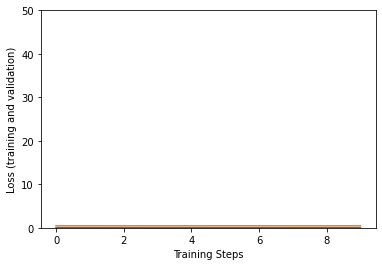

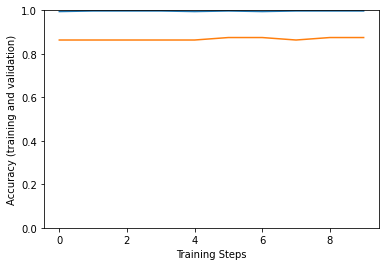

In [38]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,50])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

In [41]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [42]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Daisy' 'Dandelion' 'Rose' 'Sunflower' 'Tulip']


In [43]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 5)


In [44]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Dandelion' 'Rose' 'Rose' 'Dandelion' 'Dandelion' 'Rose' 'Rose' 'Daisy'
 'Dandelion' 'Dandelion' 'Tulip' 'Daisy' 'Dandelion' 'Daisy' 'Tulip'
 'Tulip' 'Daisy' 'Sunflower' 'Sunflower' 'Daisy' 'Dandelion' 'Daisy'
 'Daisy' 'Sunflower' 'Rose' 'Tulip' 'Rose' 'Tulip' 'Rose' 'Sunflower'
 'Sunflower' 'Rose']


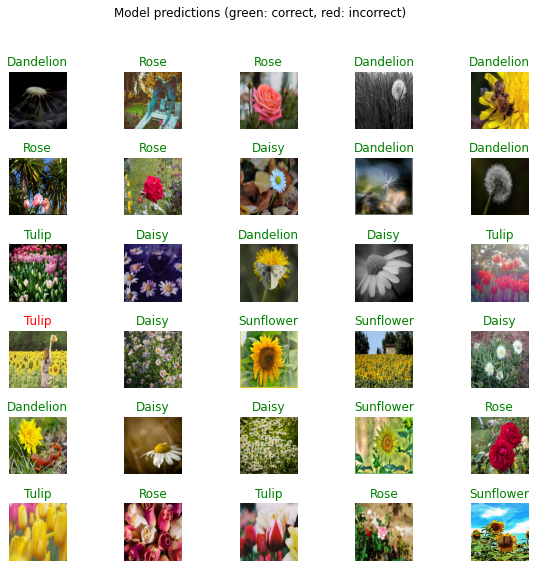

In [45]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")